# MNIST DataSet
***

The MNIST database  is a large database of handwritten digits that is commonly used for training image processing systems
The database is also used for training and testing in the field of machine learning.
It was created by "re-mixing" the samples from NIST's original datasets. 
The creators felt that since NIST's training dataset was taken from American Census Bureau employees, and the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. 

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's **training dataset**, while the other half of the training set and the other half of the test set were taken from NIST's **testing dataset**.

In this notebook I will be explaining how to
read the MNIST dataset efficiently into memory in Python.

Here is an example of the digits in the dataset.

![MnistExamples](images/MnistExamples.png)

In order to load the dataset into memory you need to visit the [MNIST](http://yann.lecun.com/exdb/mnist/) homepage and download the training and testing sets. These are the files you will need:

![files](images/files.png)

### After you download the files create a folder called data and place the files there, next we will unzip and read in one of the file.

In [1]:
import gzip ## import package to unzip the files
with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:## opens the file
    file_content = f.read() ## reads the file

#### Next we check what type of data we have read in.

In [2]:
type (file_content)

bytes

#### Now we can view the first byte (written in hexidecimal)

In [3]:
file_content [0:4]

b'\x00\x00\x08\x03'

#### This converts the hexi into an int.

In [4]:
int.from_bytes(file_content[0:4], byteorder= 'big')

2051

#### Next we can see how many images are in the file, we know this because the MNIST website says that the next four bits tells us how many images are in the file.

![info](images/info.png)

In [5]:
int.from_bytes(file_content[4:8], byteorder="big")

60000

#### byteorder="big" refers to reading the bytes using big [endian](https://thebittheories.com/little-endian-vs-big-endian-b4046c63e1f2)

In Little Endian machines, last byte of binary representation of the multi-byte data-type is stored first while in Big Endian machines, first byte of binary representation of the multi-byte data-type is stored first.

In [6]:
int.from_bytes(file_content[8:12], byteorder='big') ## tells us how many rows of pixels in each image

28

In [7]:
int.from_bytes(file_content[12:16], byteorder='big') ## tells us how many columns of pixels in each image

28

#### Now we know that each image is 28 x 28 pixels(784) we should be able to read in the first image by displaying the bits from 16 to 800.
#### But first we have to reshape the bits into a 28 x 28 array using the numpy package

In [8]:
import numpy as np ## imports the numpy package

image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8) ## reshapes the list into  28*28 

## Displaying the images

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt ## imports the matplotlib package

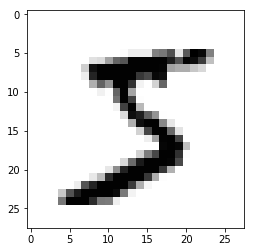

In [10]:
plt.imshow(image, cmap='gray')## display the image

We can now see the first image in the the dataset, it looks like a crudely written 5

#### Now we will read in the second image in the dataset, starting at 800 and finishing at 1584 (800 + 784)

In [11]:
image = ~np.array(list(file_content[800:1584])).reshape(28,28).astype(np.uint8)

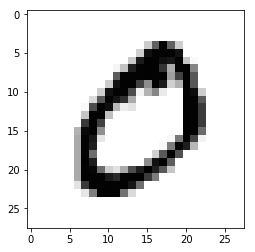

In [12]:
plt.imshow(image, cmap='gray')

Now, we can see the second image is a zero

## Reading in the label files

Now we will read in the labels file using the same gzip command we used with the images file.
after we read in the labels we can check if the images have been read in properly by checing them against each other

In [13]:
with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f: 
    labels = f.read() 

Again we check how many items are in the files using the information on the MNIST page

![labels](images/labels.png)

In [14]:
int.from_bytes(labels[4:8], byteorder="big")

60000

Again we can see there are 60000 items in the file

#### Now we will read in the first label in the file to check if it matches the first image we read in.

In [15]:
label = int.from_bytes(labels[8:9], byteorder="big") 
print(str(label))

5


So we can see the first label is 5, just like the first image was 5

#### Now we will read in the second label in the file to check if it matches the second image we read in.

In [16]:
label = int.from_bytes(labels[9:10], byteorder="big") 
print(str(label))

0


So we can see the second label is 0, just like the second image was 0